<a href="https://colab.research.google.com/github/sunshineluyao/NYU_Integrated_Marketing/blob/main/Predicting_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pip install pingouin

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/sunshineluyao/NYU_Integrated_Marketing/main/Regressions/customer_churn_train.csv')
df=df.dropna()
df.head()

In [ ]:
df.columns

# Correlation


In [ ]:
# install the software
import pingouin as pg

### The pairwise correlation 
https://pingouin-stats.org/generated/pingouin.pairwise_corr.html#pingouin.pairwise_corr

In [ ]:
pg.pairwise_corr(df,columns=['total_day_calls', 'number_customer_service_calls'], method='pearson').round(3)

In [ ]:
pg.pairwise_corr(df,columns=['total_day_calls', 'number_customer_service_calls','account_length'], method='pearson').round(3)

### The Partial correlation
https://pingouin-stats.org/generated/pingouin.partial_corr.html#pingouin.partial_corr

In [ ]:
# Partial correlation of total_day_calls and number_customer_service_calls controlling for account_length
x='total_day_calls'
y='number_customer_service_calls'
control='account_length'
pg.partial_corr(data=df, x=x, y=y, covar=control,
                method='pearson').round(3)

# Regression

## Scatterplot
https://seaborn.pydata.org/generated/seaborn.scatterplot.html


In [ ]:
#install the package
import seaborn as sns

In [ ]:
x='total_day_charge'
y='total_night_charge'
sns.scatterplot(data=df, x=x, y=y)

In [ ]:
x='total_eve_charge'
y='total_night_charge'
sns.scatterplot(data=df, x=x, y=y)

### Regression Result
https://www.statsmodels.org/stable/regression.html

In [ ]:
import statsmodels.api as sm

In [ ]:
df.info()

In [ ]:
# define the dependent and independent variables
X=df[['total_day_charge','total_eve_charge']]
y=df['total_night_charge']


In [ ]:
# add a constant to the dependent variables
X= sm.add_constant(X)
X.head()

In [ ]:
# conduct regression
model = sm.OLS(y, X).fit()

In [262]:
# print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     total_night_charge   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6247
Date:                Wed, 11 Nov 2020   Prob (F-statistic):              0.535
Time:                        11:13:58   Log-Likelihood:                -9505.8
No. Observations:                4250   AIC:                         1.902e+04
Df Residuals:                    4247   BIC:                         1.904e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                9.0749      0.185  

### Check assumptions

In [263]:
### get the residuals
predictions = model.predict(X)
residuals =y-predictions
df_res=pd.DataFrame({'Residual': residuals, 'Prediction': predictions})
df_res.head()

,Residual,Prediction
0,2.430916,9.019084
1,-1.779536,9.099536
2,-0.299869,9.159869
3,-0.640780,9.050780
4,0.623412,8.946588


In [ ]:
#print the scatter plot between residuals and predicitions
x='Prediction'
y='Residual'
sns.scatterplot(data=df_res, x=x, y=y)

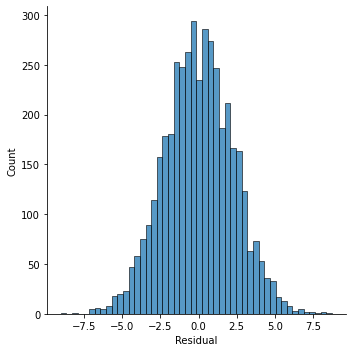

In [265]:
# histogram of the residual
sns.displot(df_res, x="Residual")

In [266]:
x=df_res['Residual']
pg.normality(x)

,W,pval,normal
Residual,0.999683,0.781811,True


In [267]:
pg.pairwise_corr(df,columns=['total_day_charge','total_eve_charge'], method='pearson').round(3)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,total_day_charge,total_eve_charge,pearson,two-sided,4250,-0.013,"[-0.04, 0.02]",0.0,-0.0,-0.013,0.388,0.028,0.139


#Logit Analysis

In [268]:
df['Churn_Numeric'] = df['churn'].apply(lambda x: 1 if x =='yes' else 0)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,Churn_Numeric
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no,0
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no,0
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no,0
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no,0
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no,0


In [ ]:
y=df['Churn_Numeric']
X=df[['total_intl_charge','number_customer_service_calls','account_length']]

In [270]:
# add a constant to the dependent variables
X= sm.add_constant(X)
X.head()

,const,total_intl_charge,number_customer_service_calls,account_length
0,1.0,3.70,1,107
1,1.0,3.29,0,137
2,1.0,1.78,2,84
3,1.0,2.73,3,75
4,1.0,2.03,3,121


In [271]:
# conduct regression
logit_model = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.382323
         Iterations 6


In [272]:
# print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     total_night_charge   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6247
Date:                Wed, 11 Nov 2020   Prob (F-statistic):              0.535
Time:                        11:14:00   Log-Likelihood:                -9505.8
No. Observations:                4250   AIC:                         1.902e+04
Df Residuals:                    4247   BIC:                         1.904e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                9.0749      0.185  

In [273]:
### get the odds ratio
np.exp(logit_model.params)

const                            0.033255
total_intl_charge                1.273896
number_customer_service_calls    1.533190
account_length                   1.001342
dtype: float64

In [274]:
### get the predictions 
pred_prob = logit_model.predict(X)
df_result=pd.DataFrame({'Pred_prob': pred_prob,'y':y})
df_result['Prediction']=df_result['Pred_prob'].apply(lambda x: 1 if x >=0.5 else 0)
df_result.head()

,Pred_prob,y,Prediction
0,0.125978,0,0
1,0.081408,0,0
2,0.118648,0,0
3,0.204234,0,0
4,0.187278,0,0


In [275]:
from sklearn.metrics import accuracy_score
Prediction = df_result['Prediction']
accuracy_score(y, Prediction)

0.859764705882353

# Cross Validation

In [276]:
## get the train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [277]:
# conduct regression
logit_model = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.382018
         Iterations 6


In [278]:
# print model summary
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:          Churn_Numeric   No. Observations:                 3400
Model:                          Logit   Df Residuals:                     3396
Method:                           MLE   Df Model:                            3
Date:                Wed, 11 Nov 2020   Pseudo R-squ.:                 0.05165
Time:                        11:14:00   Log-Likelihood:                -1298.9
converged:                       True   LL-Null:                       -1369.6
Covariance Type:            nonrobust   LLR p-value:                 1.821e-30
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -3.3140      0.256    -12.928      0.000      -3.816      -2.812
total_intl_charge                 0.2231      0.070      3.177      0.001 

In [279]:
### get the predictions on the test data
pred_prob = logit_model.predict(X_test)
df_test=pd.DataFrame({'Pred_prob': pred_prob,'y_test':y_test})
df_test['Prediction']=df_test['Pred_prob'].apply(lambda x: 1 if x >=0.5 else 0)
df_test.head()

,Pred_prob,y_test,Prediction
3471,0.326932,0,0
4126,0.106294,0,0
1805,0.195274,0,0
378,0.130086,1,0
1479,0.083485,0,0


In [280]:
from sklearn.metrics import accuracy_score
Prediction =df_test['Prediction']
accuracy_score(y_test, Prediction)

0.8541176470588235

### draw confusion matrix
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [287]:
from sklearn.metrics import confusion_matrix
confmtrx = np.array(confusion_matrix(y_test, Prediction))
pd.DataFrame(confmtrx, index=['Non-Churn','Churn'],
columns=['predicted_Non_Churn', 'predicted_Churn'])

,predicted_Non_Churn,predicted_Churn
Non-Churn,724,0
Churn,124,2


#Calculate the F1 score
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

In [288]:
from sklearn.metrics import f1_score
f1_score(y_test, Prediction)

0.03125

# Cross validation for multiple times

In [281]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
scores = cross_val_score(log_reg, X, y, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.86352941 0.85411765 0.85882353 0.86117647 0.85882353 0.85882353
 0.86588235 0.85882353 0.85882353 0.85882353]


In [282]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.8541176470588235, 0.859764705882353, 0.8658823529411764)

# Appendix

In [283]:
Z =np.linspace(-100,100,10000)
P=np.exp(Z)/(1+np.exp(Z))
import plotly.express as px
fig = px.scatter(x=Z, y=P)
fig.show()